In [51]:
import pathlib
from datetime import datetime

from astropy.table import Table
from astropy.table import Column
from astropy.time import Time
import astropy.coordinates as coord
import astropy.units as u


import numpy as np

# Set up matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

%matplotlib inline

# See https://mpld3.github.io/quickstart.html !!

# or https://docs.bokeh.org/en/latest/
# https://docs.bokeh.org/en/latest/docs/user_guide/quickstart.html#userguide-quickstart


from bokeh.plotting import figure, output_file, output_notebook, show
from bokeh.models import Legend, ColumnDataSource, HoverTool

from bokeh.sampledata.stocks import AAPL

In [ ]:

# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

# output to static HTML file (with CDN resources)
#output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")
output_notebook()

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 100), y_range=(0, 100))

# add a circle renderer with vectorized colors and sizes
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [ ]:


# prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=800, plot_height=350, x_axis_type="datetime")

# add renderers
p.circle(aapl_dates, aapl, size=4, color='darkgrey', alpha=0.2, legend_label='close')
p.line(aapl_dates, aapl_avg, color='navy', legend_label='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [ ]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
#file = 'ps_cone_1000_2019-04-14.csv'
file = 'ps_cone-2019-07-15-23:37.csv'
path = data_dir / file

# Read csv into Table
old_data = Table.read(path, format='ascii.csv')
data = old_data

In [2]:
data_dir = pathlib.Path('/Users/donald/Box Sync/navo_stats')
file = 'ps_cone-2019-11-12-13-58.csv'
path = data_dir / file

# Read csv into Table
medium_data = Table.read(path, format='ascii.csv')
data = medium_data

In [48]:

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=500, plot_height=500)

data["num_rows"] = data["num_rows"].astype(float)  # Gets rid of the warning when implicitly converted for Pandas
df = data["int0_duration", "int1_duration", "num_rows"].to_pandas().copy()

# add renderers
qt_rend = p.circle(df["int0_duration"], df["num_rows"], size=4, color='red', alpha=0.2)
dt_rend = p.circle(df["int1_duration"], df["num_rows"], size=4, color='green', alpha=0.2)

legend = Legend(items=[
    ("Query Time",   [qt_rend]),
    ("Download Time", [dt_rend])
], location=(0, 40), click_policy='hide')
p.add_layout(legend, 'below')

# NEW: customize by setting attributes
p.title.text = "Times versus # of Result Rows"
#p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Duration (sec)'
p.yaxis.axis_label = '# of Rows'
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.05


# show the results
show(p)

Loading BokehJS ...

In [58]:

# output to static HTML file
#output_file("stocks.html", title="stocks.py example")
output_notebook()

# create a new plot with a datetime axis type
p = figure(plot_width=500, plot_height=500)

data["num_rows"] = data["num_rows"].astype(float)  # Gets rid of the warning when implicitly converted for Pandas
df = data["int0_duration", "int1_duration", "num_rows", "base_name", "service_type",
          "RA", "DEC", "SR"].to_pandas().copy()
source = ColumnDataSource(df)

# add renderers
qt_rend = p.circle(x="int0_duration", y="num_rows", source=source, size=4, color='red', alpha=0.2)
dt_rend = p.circle(x="int1_duration", y="num_rows", source=source, size=4, color='green', alpha=0.2)

legend = Legend(items=[
    ("Query Time",   [qt_rend]),
    ("Download Time", [dt_rend])
], location=(0, 40), click_policy='hide')
p.add_layout(legend, 'below')

hover = HoverTool(tooltips=[
    ("Name", "@base_name"),
    ("Service Type", "@service_type"),
    ("RA", "@RA"),
    ("Dec", "@DEC"),
    ("Radius", "@SR")
])
p.add_tools(hover)

# NEW: customize by setting attributes
p.title.text = "Times versus # of Result Rows"
#p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Duration (sec)'
p.yaxis.axis_label = '# of Rows'
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.05


# show the results
show(p)

Loading BokehJS ...

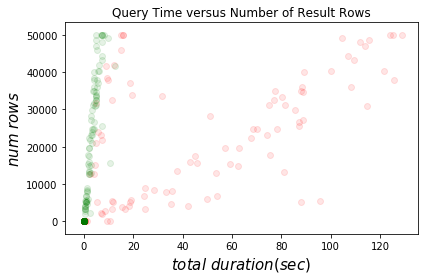

In [47]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["num_rows"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["num_rows"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$num\ rows$", fontsize=15)
ax.set_title('Query Time versus Number of Result Rows')

#ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots()

size = data["num_rows"] / 500
ax.scatter(data["int0_duration"], data["SR"], c='red', alpha=0.1)
ax.scatter(data["int1_duration"], data["SR"], c='green', alpha=0.1)

ax.set_xlabel("$total\ duration (sec)$", fontsize=15)
ax.set_ylabel("$query\ radius (deg)$", fontsize=15)
ax.set_title('Query Time versus Radius')

#ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
def convert_date_string(date_string):
    dt = datetime.strptime(date_string, '%Y-%m-%d-%H:%M:%S.%f')
    new_string = dt.strftime('%Y-%m-%dT%H:%M:%S.%f')
    return new_string

In [ ]:

#short_data = data[0:500]
short_data = data
dts = [datetime.strptime(dt, '%Y-%m-%d-%H:%M:%S.%f') for dt in short_data['start_time']]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dts, short_data["int0_duration"] + short_data["int1_duration"], alpha=0.1)

ax.set_ylabel("$total\ duration (sec)$")

# format the ticks
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
#locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_xlim(dts[0], dts[-1])
ax.set_title('Query Duration Over Time')

ax.grid(True)
#fig.autofmt_xdate()

plt.show()